c:\Users\reigi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


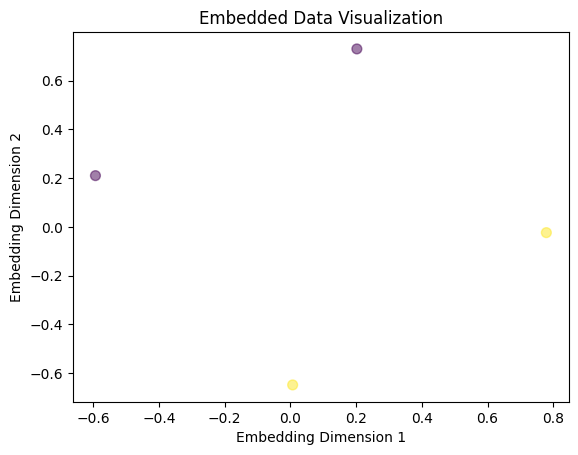

c:\Users\reigi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\reigi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Ordinal Encoding - NMI: 1.0, ARI: 1.0


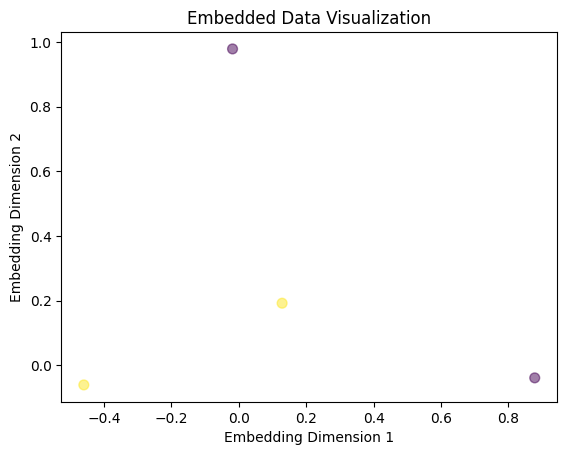

c:\Users\reigi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


One-Hot Encoding - NMI: 0.3437110184854508, ARI: 0.0


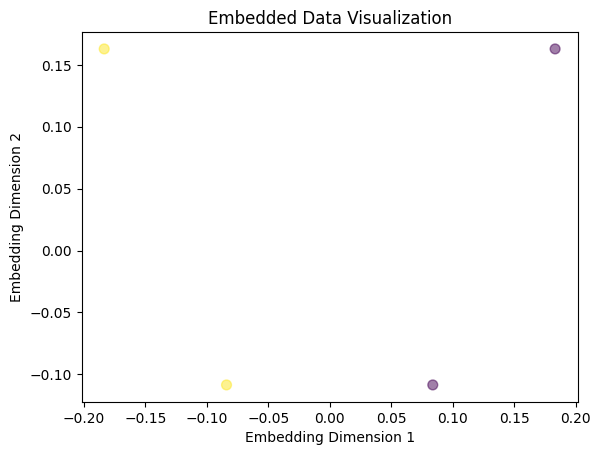

c:\Users\reigi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Link Encoding - NMI: 0.0, ARI: -0.5


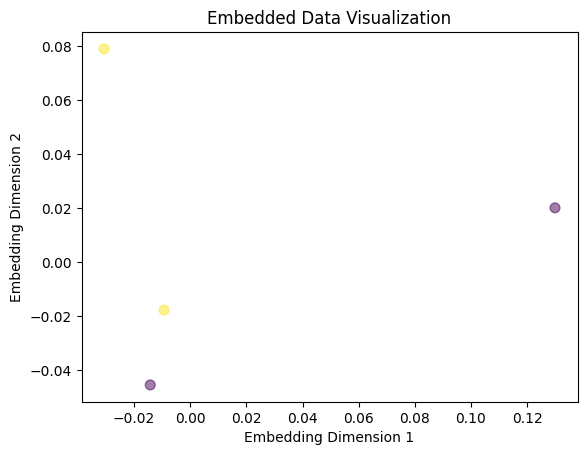

c:\Users\reigi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\reigi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


CDE Encoding - NMI: 0.3437110184854508, ARI: 0.0


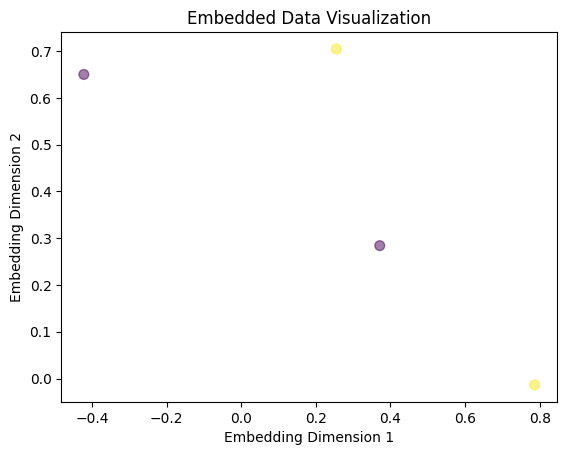

c:\Users\reigi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\reigi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


SE+Joint - NMI: 0.0, ARI: -0.5


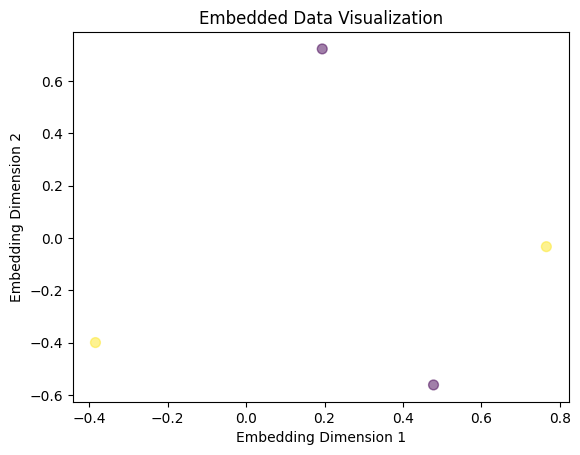

SE+Mean - NMI: 0.0, ARI: -0.5


c:\Users\reigi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from sklearn.manifold import spectral_embedding
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

%matplotlib inline

X = np.array([[1, 2],
              [3, 4],
              [5, 6],
              [7, 8]])

k = 2

y_true = np.array([0, 1, 0, 1])

def construct_similarity_graph(data, encoding_type='ordinal'):
    n = len(data)
    graph = np.zeros((n, n))

    if encoding_type == 'ordinal':
        for i in range(n):
            for j in range(i + 1, n):
                similarity = np.sum(data[i] >= data[j])
                graph[i, j] = similarity
                graph[j, i] = similarity

    elif encoding_type == 'one-hot':
        for i in range(n):
            for j in range(i + 1, n):
                similarity = np.sum(data[i] == data[j])
                graph[i, j] = similarity
                graph[j, i] = similarity

    return graph

def link_encoding(data):
    distances = pdist(data, metric='euclidean')
    link_graph = squareform(distances)
    return link_graph

def cde_encoding(data):
    cde_graph = np.dot(data, data.T)
    return cde_graph

def graph_embedding(graph, method='spectral'):
    if method == 'spectral':
        embedding = spectral_embedding(graph, n_components=2)
    else:
        embedding = np.zeros((graph.shape[0], 2))
    return embedding

def categorical_data_clustering(X, k, encoding_type='ordinal', embedding_method='spectral'):
    if encoding_type == 'link':
        graph = link_encoding(X)
    elif encoding_type == 'cde':
        graph = cde_encoding(X)
    else:
        graph = construct_similarity_graph(X, encoding_type)

    embedding_matrix = graph_embedding(graph, method=embedding_method)

    plt.scatter(embedding_matrix[:, 0], embedding_matrix[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.5)
    plt.title('Embedded Data Visualization')
    plt.xlabel('Embedding Dimension 1')
    plt.ylabel('Embedding Dimension 2')
    plt.show()

    clustering_model = KMeans(n_clusters=k)
    clusters = clustering_model.fit_predict(embedding_matrix)

    return clusters, embedding_matrix

def evaluate_clustering(true_labels, predicted_labels):
    nmi = normalized_mutual_info_score(true_labels, predicted_labels)
    ari = adjusted_rand_score(true_labels, predicted_labels)
    return nmi, ari

# Ordinal 
predicted_labels_ordinal, embedded_data_ordinal = categorical_data_clustering(X, k, encoding_type='ordinal')
nmi_ordinal, ari_ordinal = evaluate_clustering(y_true, predicted_labels_ordinal)
print(f'Ordinal Encoding - NMI: {nmi_ordinal}, ARI: {ari_ordinal}')

# One-Hot 
predicted_labels_one_hot, embedded_data_one_hot = categorical_data_clustering(X, k, encoding_type='one-hot')
nmi_one_hot, ari_one_hot = evaluate_clustering(y_true, predicted_labels_one_hot)
print(f'One-Hot Encoding - NMI: {nmi_one_hot}, ARI: {ari_one_hot}')

# Link 
predicted_labels_link, embedded_data_link = categorical_data_clustering(X, k, encoding_type='link')
nmi_link, ari_link = evaluate_clustering(y_true, predicted_labels_link)
print(f'Link Encoding - NMI: {nmi_link}, ARI: {ari_link}')

# CDE 
predicted_labels_cde, embedded_data_cde = categorical_data_clustering(X, k, encoding_type='cde')
nmi_cde, ari_cde = evaluate_clustering(y_true, predicted_labels_cde)
print(f'CDE Encoding - NMI: {nmi_cde}, ARI: {ari_cde}')

# SE+Joint
predicted_labels_se_joint, embedded_data_se_joint = categorical_data_clustering(X, k, encoding_type='ordinal', embedding_method='spectral')
nmi_se_joint, ari_se_joint = evaluate_clustering(y_true, predicted_labels_se_joint)
print(f'SE+Joint - NMI: {nmi_se_joint}, ARI: {ari_se_joint}')

# SE+Mean
predicted_labels_se_mean, embedded_data_se_mean = categorical_data_clustering(X, k, encoding_type='ordinal', embedding_method='spectral')
nmi_se_mean, ari_se_mean = evaluate_clustering(y_true, predicted_labels_se_mean)
print(f'SE+Mean - NMI: {nmi_se_mean}, ARI: {ari_se_mean}')
